In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(
    host = "localhost",
    username="root",
    password="pakistan",
    database="ecommerse"
)
cur=db.cursor()



# List all unique cities where customers are located

In [2]:
query="""select distinct geolocation_city from geolocation"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Cities of Customers"])
df.head()

,Cities of Customers
0,sao paulo
1,sao bernardo do campo
2,jundiaí
3,taboão da serra
4,sãopaulo


# Count the number of orders placed in 2017

In [3]:
query="""select count(order_id) from orders
where year(order_purchase_timestamp)=2017"""

cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017 are",data[0][0]

('Total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [4]:
query="""select upper(products.product_category),round(sum(payments.payment_value),2) from
products join order_items
on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by products.product_category"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Product Category","Total Sale"])
df

,Product Category,Total Sale
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [5]:
query="""select sum(case when payment_installments >=1 then 1 else 0 end)/count(payment_installments)*100 
from payments"""

cur.execute(query)
data=cur.fetchall()
"the percentage of orders that were paid in installments is ",data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state.

In [6]:
query="""select customers.customer_state,count(customers.customer_id)
from customers
group by customers.customer_state"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customers State","Total Customers From each State"])
df

,Customers State,Total Customers From each State
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


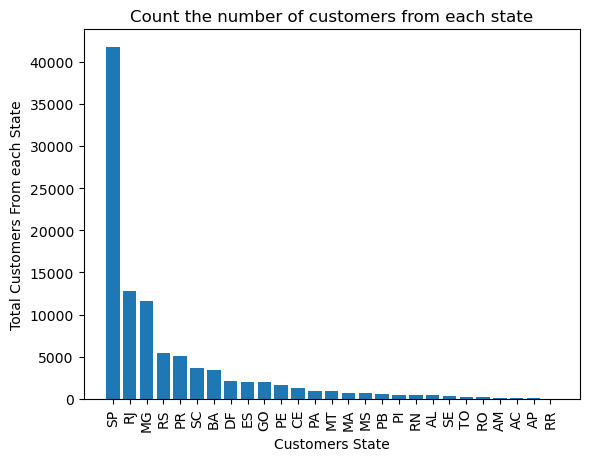

In [7]:
df=df.sort_values(by="Total Customers From each State",ascending=False)
plt.bar(df["Customers State"],df["Total Customers From each State"])
plt.xticks(rotation=90)
plt.xlabel("Customers State")
plt.ylabel("Total Customers From each State")
plt.title("Count the number of customers from each state")
plt.show()

# Calculate the number of orders per month in 2018

In [10]:
query="""select monthname(order_purchase_timestamp ) months, count(order_id) order_count
from orders where year(order_purchase_timestamp ) =2018
group by months"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Months","Order_Count"])
df

,Months,Order_Count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


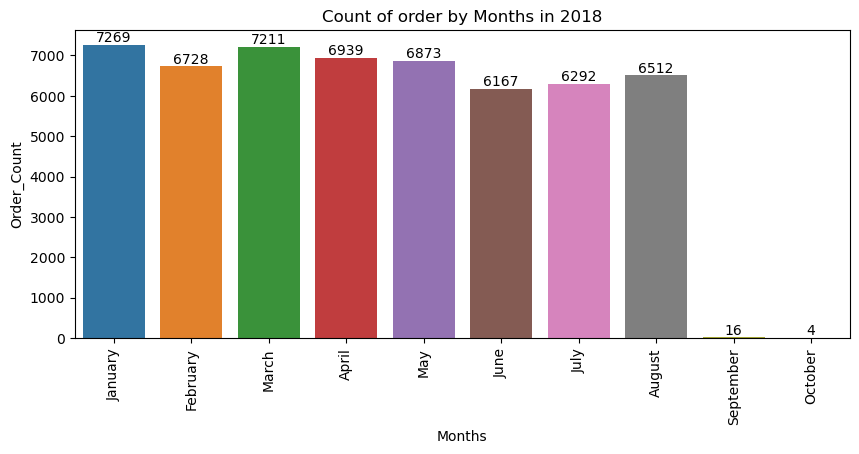

In [19]:
plt.figure(figsize=(10,4))
orde=["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(data=df,x=df["Months"],y=df["Order_Count"],order=orde)
plt.xlabel("Months")
plt.ylabel("Order_Count")
plt.title("Count of order by Months in 2018")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city.

In [21]:
query="""with customer_order_id as 
(select orders.order_id,orders.customer_id,count(order_items.order_id) oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)
select customers.customer_city,avg(customer_order_id.oc) average_of_customers_order
from customers join customer_order_id
on customers.customer_id = customer_order_id.customer_id
group by customers.customer_city order by average_of_customers_order desc"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customers City","Average Order OF Customers"])
df

,Customers City,Average Order OF Customers
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,candido godoi,6.0000
3,datas,6.0000
4,matias olimpio,5.0000
...,...,...
4105,sebastiao leal,1.0000
4106,morro agudo de goias,1.0000
4107,santa filomena,1.0000
4108,guamiranga,1.0000


# Calculate the percentage of total revenue contributed by each product category.

In [22]:
query="""select upper(products.product_category),sum(payments.payment_value)/(select sum(payment_value) from payments)*100 sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by products.product_category order by sales_percentage desc"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Catagory","Percentage Distribution"])
df

,Catagory,Percentage Distribution
0,BED TABLE BATH,10.697529
1,HEALTH BEAUTY,10.352841
2,COMPUTER ACCESSORIES,9.902824
3,FURNITURE DECORATION,8.933649
4,WATCHES PRESENT,8.927654
...,...,...
69,PC GAMER,0.013583
70,HOUSE COMFORT 2,0.010685
71,CDS MUSIC DVDS,0.007492
72,FASHION CHILDREN'S CLOTHING,0.004908


# Identify the correlation between product price and the number of times a product has been purchased.

In [32]:
query="""select upper(products.product_category), count(order_items.product_id),avg(order_items.price) 
from products join order_items
on products.product_id = order_items.product_id
group by upper(products.product_category) order by count(order_items.product_id),avg(order_items.price) desc"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Catagory","Order Count","Price"])

arr1=df["Order Count"]
arr2=df["Price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631552],
       [-0.10631552,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [5]:
query="""select *,dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Sellers","Payments","Ranks"])
df.head()

,Sellers,Payments,Ranks
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5


#  Calculate the year-over-year growth rate of total sales.

In [18]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years order by years asc)
select years,((payment - lag(payment,1) over(order by years))/lag(payment,1) over(order by years))*100 as prev_val
from a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Years","Year over Year"])
df

,Years,Year over Year
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [20]:
query="""with a as(select customers.customer_id,min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id))/(count(distinct b.customer_id))
from a left join b 
on a.customer_id=b.customer_id"""

cur.execute(query)
data=cur.fetchall()
data 
# Here The Customers cannot purchase next order so in this why they can show None

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

In [2]:
query="""select years,customer_id,payment,d_rank from
(select year(orders.order_purchase_timestamp) years,orders.customer_id,sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank
from orders join payments
on orders.order_id = payments.order_id
group by years,orders.customer_id) as a
where d_rank<=3"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Years","Customers Id","Payments","Ranks"])
df

,Years,Customers Id,Payments,Ranks
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


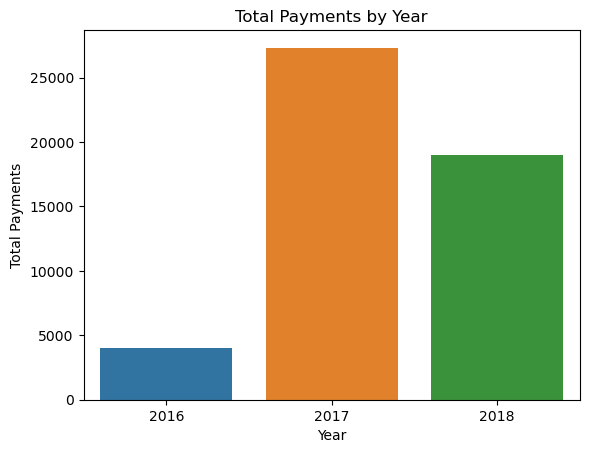

In [4]:
sns.barplot(x="Years", y="Payments", data=df, estimator=sum, errorbar=None)
plt.title("Total Payments by Year")
plt.ylabel("Total Payments")
plt.xlabel("Year")
plt.show()